# <b><u>Titanic Classification <b></u>

Building  a predictive model to determine the
likelihood of survival for passengers on
the Titanic using data science techniques
in Python.  
Here we will use <U>Logestic Regresion using Pyton </u>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno #missingno library to create a matrix plot that visually represents missing values in a DataFrame

In Python strings, the backslash is an escape character, and when it's followed by certain characters, it is treated as an escape sequence.  
<b>Raw String:</B>
Prefix the string with r to create a raw string. This treats backslashes as literal characters and doesn't interpret them as escape sequences.

In [2]:
train = pd.read_csv(r'C:\Users\IQRA MIYAJI\OneDrive\Desktop\Titanic classification\train (1).csv') 
# raw string .

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis 

#### Finding Missing Data.
Use Seaborn to create heatmap to verify where is the missing data.

<Axes: >

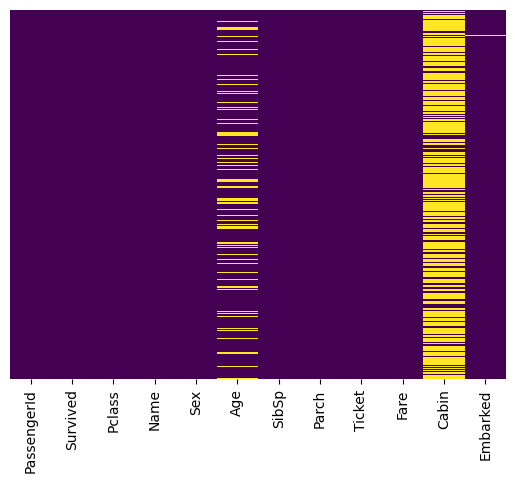

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

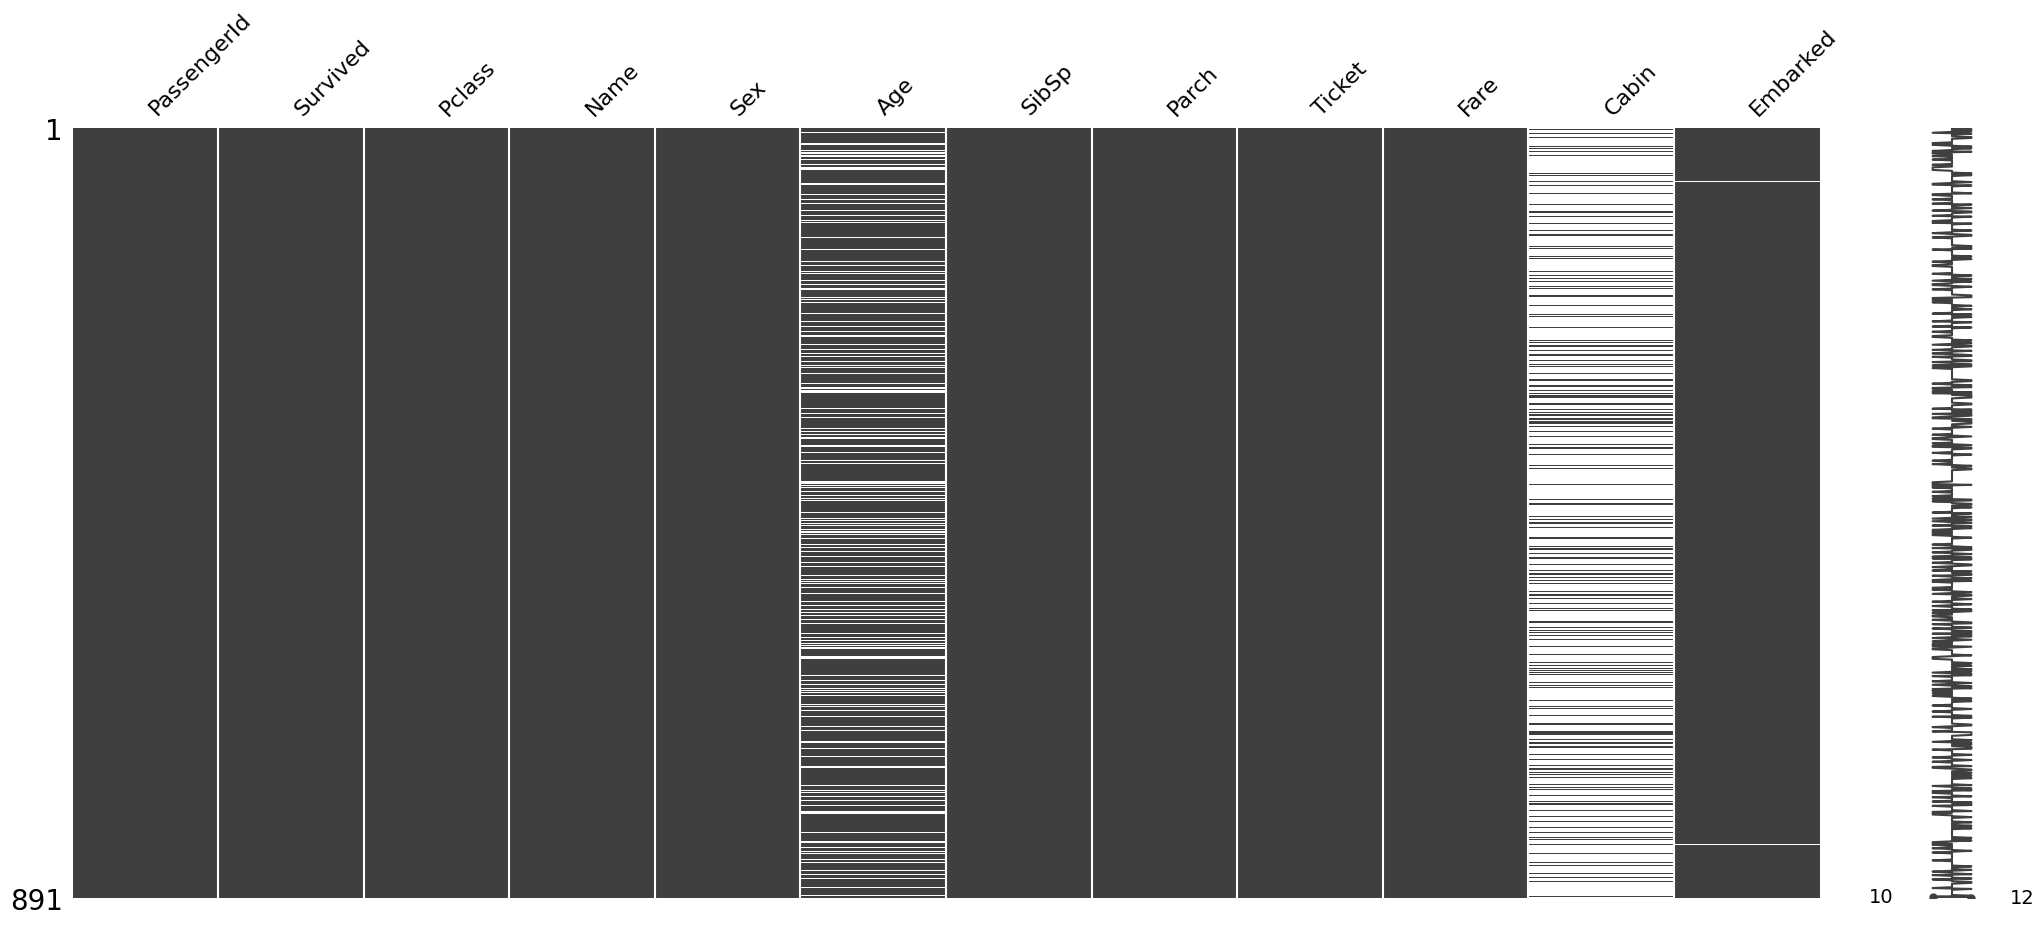

In [5]:
msno.matrix(train)
plt.show()

In [6]:
print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


The code `train.isnull().sum()` is used to calculate the sum of `True` values <u>(missing values)</U> for each column in the Pandas DataFrame `train`. The result is a Pandas Series where the index represents column names, and the values represent the count of missing values in each column.

The subsequent method `.sort_values(ascending=False)` is then applied to this Series. This method sorts the Series in descending order based on the count of missing values. Consequently, columns with the highest counts of missing values will appear first in the sorted Series.


In [7]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

Approximately twenty percent of the Age data is absent. The percentage of missing age is probably low enough to allow for a decent replacement using imputation. Based on the Cabin column, it appears that we are simply missing too much information to be able to use the data in a meaningful way. We'll most likely remove this in the future or replace it with a different feature like "Cabin Known: 1 or 0".

C:\Users\IQRA MIYAJI\AppData\Local\Temp\ipykernel_6740\1740572605.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=train,palette='pastel')


<Axes: xlabel='Survived', ylabel='count'>

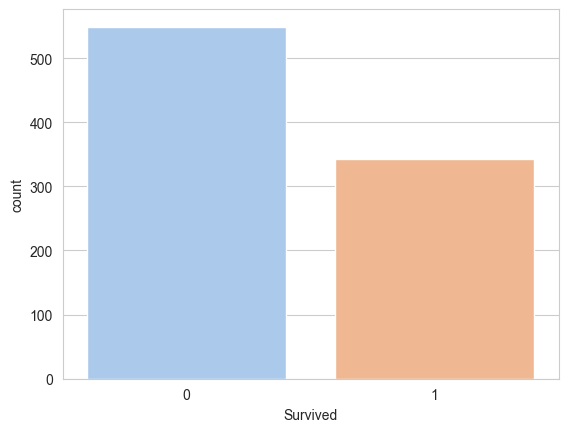

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='pastel')

<Axes: xlabel='Survived', ylabel='count'>

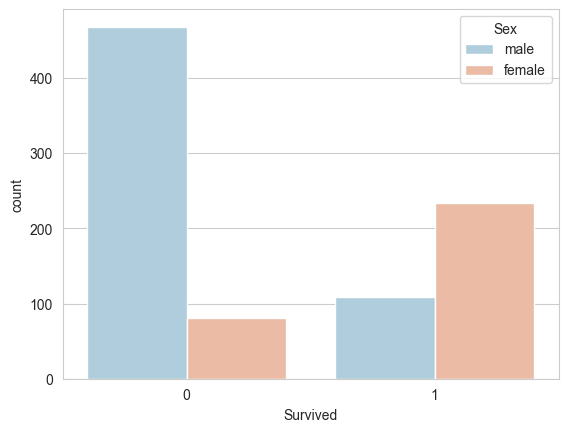

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

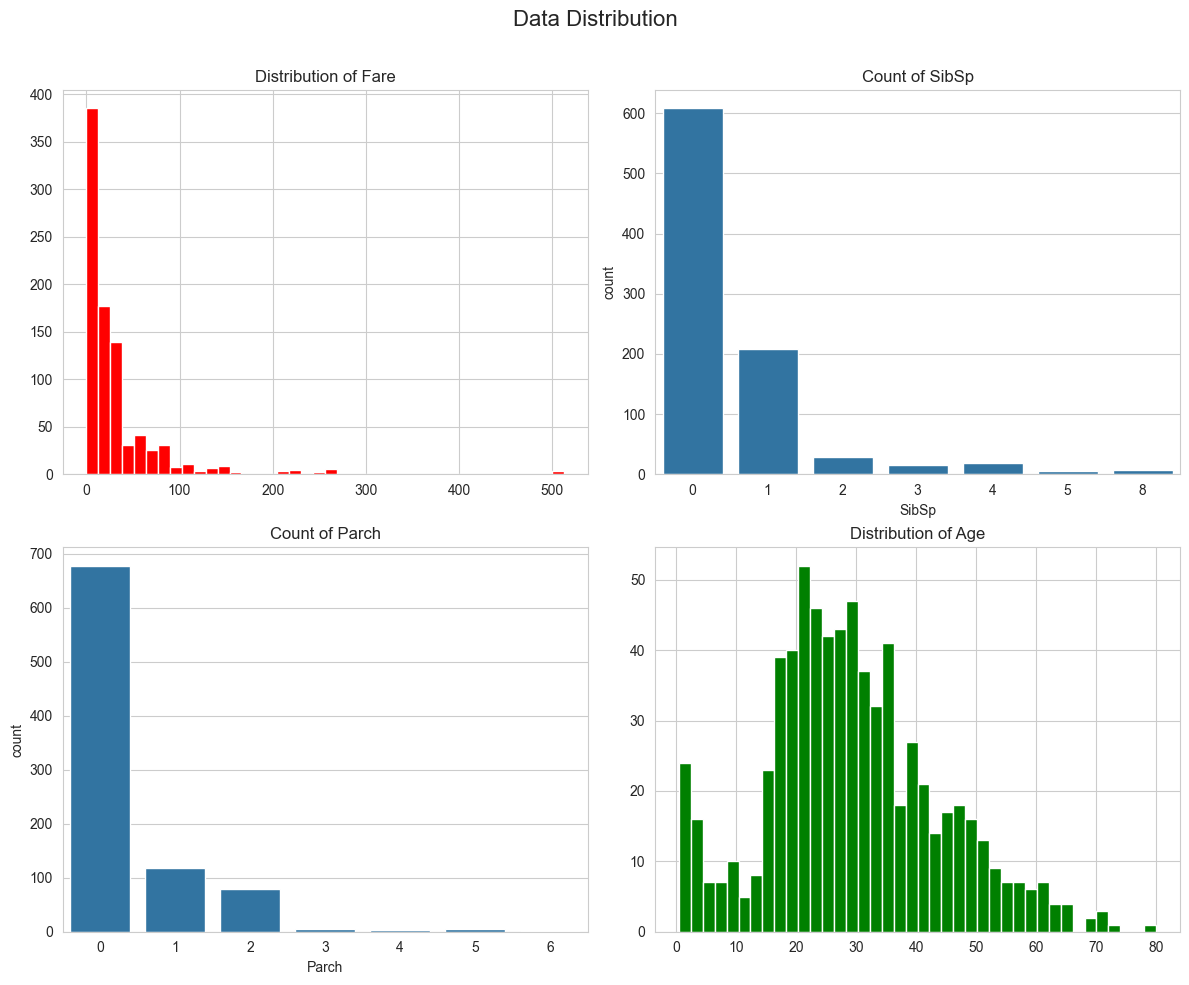

In [10]:
plt.figure(figsize=(12,10))

# Plot 1: Histogram for 'Fare'
plt.subplot(2, 2, 1)
train['Fare'].hist(color='red', bins=40)
plt.title('Distribution of Fare')

# Plot 2: Countplot for 'SibSp'
plt.subplot(2, 2, 2)
sns.countplot(x='SibSp', data=train)
plt.title('Count of SibSp')

# Plot 3: Countplot for 'Parch'
plt.subplot(2, 2, 3)
sns.countplot(x='Parch', data=train)
plt.title('Count of Parch')

# Plot 4: Another Histogram for 'Fare'
plt.subplot(2, 2, 4)
train['Age'].hist(color='green', bins=40)
plt.title('Distribution of Age')

# Adjust layout
plt.tight_layout()
plt.suptitle ('Data Distribution',fontsize=16)
plt.subplots_adjust(top=0.9)
# Display the subplots
plt.show()

### Data Cleaning  
Rather than simply removing the rows with the missing age data, we wish to add the missing age data. Filling in the average age of each passenger is one method to accomplish this (imputation). We may, however, check the average age by passenger class to be more astute about this.

<Axes: xlabel='Pclass', ylabel='Age'>

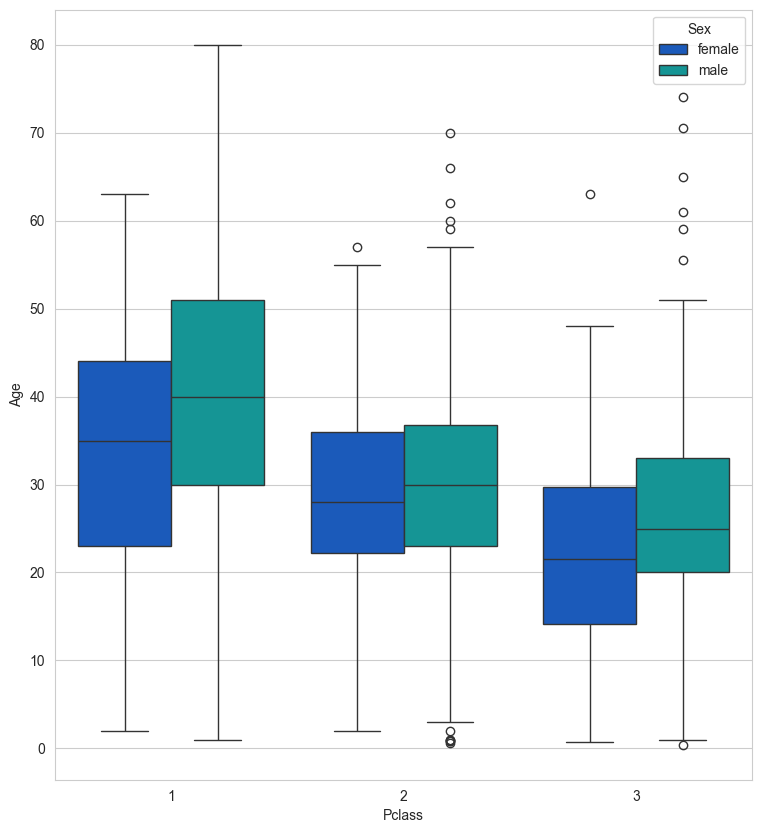

In [11]:
plt.figure(figsize=(9,10))
sns.boxplot(x='Pclass',y='Age',data=train, hue='Sex',palette='winter')

As we can  see, older and wealthier travelers tend to be in the higher classes, which makes sense. These average age data will be used to impute age based on Pclass.

In [12]:
def impute_age(cols):
    Age = cols['Age']
    Pclass = cols["Pclass"]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [13]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [14]:
train['Embarked'] = train['Embarked'].fillna('S')

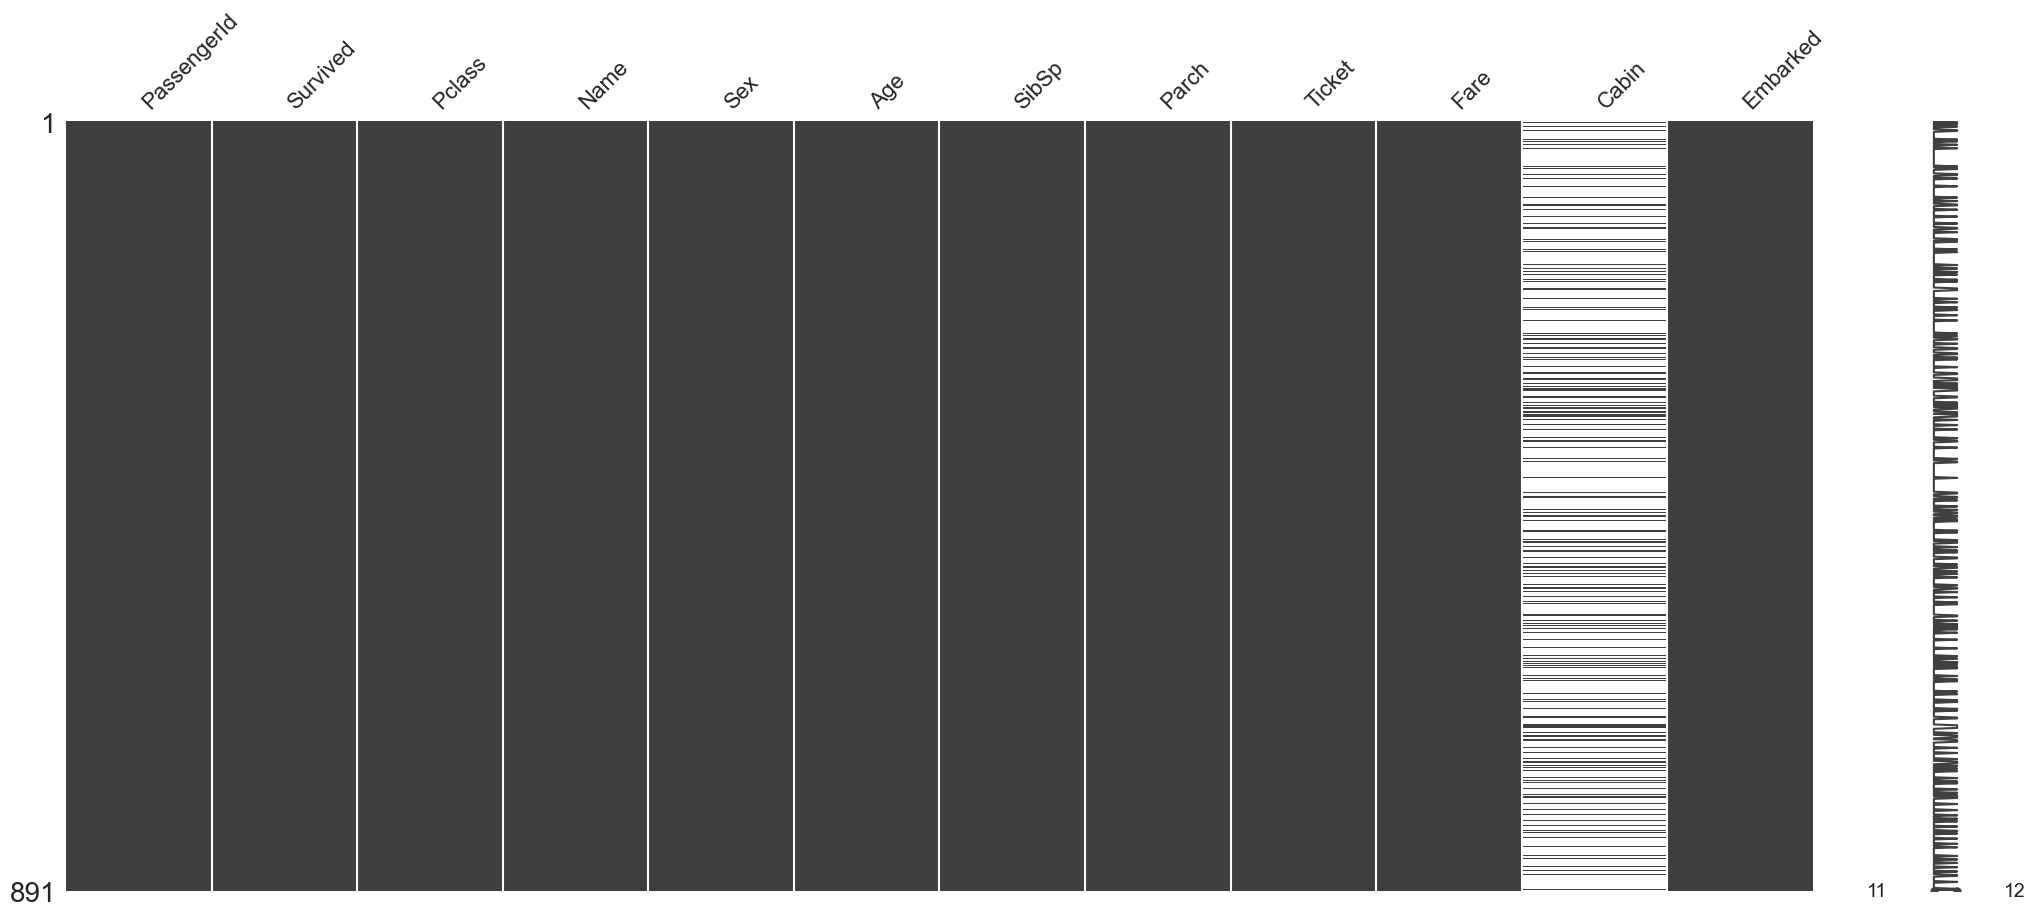

In [15]:
msno.matrix(train)
plt.show()

In [16]:
train.drop('Cabin',axis=1,inplace=True)

In [17]:
train.dropna(inplace=True)

### Converting Categorical Features
We have to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [18]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [19]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train,sex,embark],axis=1)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


 Now Our Data is ready for Model.

### Building a Logistic Regression model 
Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

#### Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    train.drop(['Survived'], axis=1),  # Features (X)
    train['Survived'],                  # Target variable (y)
    test_size=0.10,                     # Percentage of data to be used for testing (10% in this case)
    random_state=101                    # Random seed for reproducibility
)


1. **`train.drop(['Survived'], axis=1)`:**  
   - This selects all the features (independent variables) for the model.
   - The `drop` method is used to remove the column labeled 'Survived' from the DataFrame `train`.
   - The resulting DataFrame contains only the features.

2. **`train['Survived']`:**  
   - This selects the target variable (dependent variable) that the model will predict.
   - In this case, it is the 'Survived' column from the original DataFrame `train`.

3. **`test_size=0.10`:**  
   - This parameter specifies the proportion of the dataset to include in the test split.
   - In this case, 10% of the data will be used for testing, and the remaining 90% will be used for training.

4. **`random_state=101`:**  
   - This parameter is used to set a seed for the random number generator.
   - Setting a random seed ensures that the split is reproducible. If you run the code again with the same seed (101 in this case), you'll get the same split. The actual value doesn't matter; what's important is that it remains constant for reproducibility.

5. **`X_train, X_test, y_train, y_test`:**  
   - These variables store the results of the `train_test_split` function.
   - `X_train` and `X_test` are the feature sets for training and testing, respectively.
   - `y_train` and `y_test` are the corresponding target variables.

This process is commonly used in machine learning to divide a dataset into training and testing sets. The model is trained on the training set and evaluated on the testing set to assess its performance on unseen data.


#### Training and Predicting

In [23]:
from sklearn.linear_model import LogisticRegression

**`logmodel = LogisticRegression()`**   
    - This line creates an instance of the LogisticRegression class from scikit-learn.  
    - LogisticRegression is a class that implements logistic regression, which is a classification algorithm used for binary and multiclass classification problems.  
    - logmodel is a variable that now holds the logistic regression model. 
  

**`logmodel.fit(X_train, y_train)`**:
    - The fit method is used to train the logistic regression model.  
    - X_train represents the feature set (independent variables) used for training the model.  
    - y_train represents the target variable (dependent variable) used for training the model.  
    - During the training process, the model learns the parameters (coefficients) that define the decision boundary between different classes.  
After these two lines, the logmodel variable contains a trained logistic regression model. This model can then be used to make predictions on new, unseen data.


In [24]:
logmodel = LogisticRegression(max_iter=1000)  # Set max_iter to a higher value
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [25]:
predictions = logmodel.predict(X_test) # Making predictions on the test set
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
331,332,1,45.5,0,0,28.500,True,False,True
700,701,1,18.0,1,0,227.525,False,False,False
748,749,1,19.0,1,0,53.100,True,False,True
751,752,3,6.0,0,1,12.475,True,False,True
481,482,2,29.0,0,0,0.000,True,False,True


In [26]:
predictions # Displaying the predicted values

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1], dtype=int64)

### Evalution
We can check precision,recall,f1-score using classification report!

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
print(confusion_matrix(y_test,predictions)) # Printing the confusion matrix

[[45  6]
 [12 27]]


**Classification Report in scikit-learn**

The `classification_report` function in scikit-learn generates a detailed and comprehensive report that includes various classification metrics. These metrics provide a holistic assessment of the performance of a classification model, particularly in scenarios involving multiple classes. The key metrics included in the classification report are:

**Precision**
Precision is the ratio of correctly predicted positive observations to the total predicted positives. It is calculated using the formula:  
<u>Precision = TP / (TP + FP)</u>

**Recall (Sensitivity or True Positive Rate)**
Recall measures the ratio of correctly predicted positive observations to all observations in the actual class. It is calculated using the formula:  
 <u> Recall = (TP / (TP + FN))</u>

**F1-Score**
The F1-Score is the weighted average of precision and recall, providing a balance between the two metrics. It is calculated using the formula:  
<u> F1-Score = 2 * Precision * Recall / (Precision + Recall)</u>

**Support**
Support represents the number of actual occurrences of the class in the specified dataset. It provides context for the other metrics and helps in understanding the distribution of classes.



In [29]:
print(classification_report(y_test,predictions)) # Printing the classification report

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        51
           1       0.82      0.69      0.75        39

    accuracy                           0.80        90
   macro avg       0.80      0.79      0.79        90
weighted avg       0.80      0.80      0.80        90



## Decision Tree Classifiction

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
dt_pred = dt_model.predict(X_test)

In [33]:
print(confusion_matrix(y_test,dt_pred))

[[44  7]
 [15 24]]


In [34]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        51
           1       0.77      0.62      0.69        39

    accuracy                           0.76        90
   macro avg       0.76      0.74      0.74        90
weighted avg       0.76      0.76      0.75        90



## XGBoosts Classifier

In [35]:
from xgboost import XGBClassifier 
xgboost = XGBClassifier(n_estimators=1000) # Create an XGBoost classifier with 1000 estimators (trees)
xgboost.fit(X_train,y_train) # Train the XGBoost classifier on the training data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
xg_pred = xgboost.predict(X_test)

In [37]:
print(confusion_matrix(y_test,xg_pred))

[[46  5]
 [15 24]]


In [38]:
print(classification_report(y_test,xg_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        51
           1       0.83      0.62      0.71        39

    accuracy                           0.78        90
   macro avg       0.79      0.76      0.76        90
weighted avg       0.79      0.78      0.77        90



## ANN

Using **Tensor Flow** in backend.

In [39]:
import keras 
from keras.layers import Dense
from keras.models import Sequential

In [40]:
from keras.models import Sequential
from keras.layers import Dense

ann = Sequential()
ann.add(Dense(units=32, kernel_initializer='uniform', activation='relu', input_dim=9))
ann.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
ann.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))


In [41]:
ann.fit(X_train,y_train, batch_size=32, nb_epoch=300,verbose= 0)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\IQRA MIYAJI\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\IQRA MIYAJI\AppData\Local\Temp\ipykernel_6740\474796194.py", line 1, in <module>
    ann.fit(X_train,y_train, batch_size=32, nb_epoch=300,verbose= 0)
  File "c:\Users\IQRA MIYAJI\OneDrive\Desktop\python 3.11.5\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\IQRA MIYAJI\OneDrive\Desktop\python 3.11.5\Lib\site-packages\keras\src\utils\traceback_utils.py", line 67, in error_handler
    filtered_tb = _process_traceback_frames(e.__traceback__)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: Model.fit() got an unexpected keyword argument 'nb_epoch'

During handling of the above exception, another exception occurred:

Traceback (most r

In [42]:
X_test = X_test.astype(float)
ann_pred = ann.predict(X_test)
ann_pred = [1 if y >= 0.5 else 0 for y in ann_pred]
print(ann_pred)


3/3 [==============================] - 0s 0s/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [43]:
print(confusion_matrix(y_test,ann_pred))

[[50  1]
 [38  1]]


In [44]:
print(classification_report(y_test,ann_pred))

              precision    recall  f1-score   support

           0       0.57      0.98      0.72        51
           1       0.50      0.03      0.05        39

    accuracy                           0.57        90
   macro avg       0.53      0.50      0.38        90
weighted avg       0.54      0.57      0.43        90



In [45]:
test = pd.read_csv(r'C:\Users\IQRA MIYAJI\OneDrive\Desktop\Titanic classification\test.csv')

<Axes: >

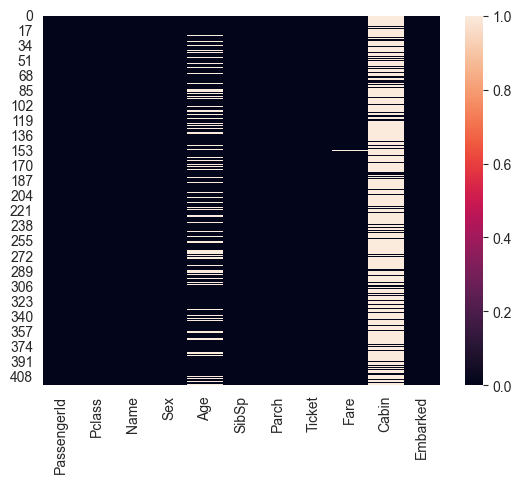

In [46]:
sns.heatmap(test.isnull())

In [47]:
test.drop('Cabin',axis=1,inplace=True)

In [48]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [50]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [51]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [52]:
sex_test = pd.get_dummies(test['Sex'],drop_first=True)
embark_test= pd.get_dummies(test['Embarked'],drop_first=True)

In [53]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [54]:
test = pd.concat([test,sex_test,embark_test],axis=1)
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,True,True,False
1,893,3,47.0,1,0,7.0000,False,False,True
2,894,2,62.0,0,0,9.6875,True,True,False
3,895,3,27.0,0,0,8.6625,True,False,True
4,896,3,22.0,1,1,12.2875,False,False,True


In [62]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [63]:
ann.fit(train.drop(['Survived'],axis=1),train['Survived'] , nb_epoch=300,verbose= 0)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\IQRA MIYAJI\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\IQRA MIYAJI\AppData\Local\Temp\ipykernel_6740\2046442625.py", line 1, in <module>
    ann.fit(train.drop(['Survived'],axis=1),train['Survived'] , nb_epoch=300,verbose= 0)
  File "c:\Users\IQRA MIYAJI\OneDrive\Desktop\python 3.11.5\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\IQRA MIYAJI\OneDrive\Desktop\python 3.11.5\Lib\site-packages\keras\src\utils\traceback_utils.py", line 67, in error_handler
    filtered_tb = _process_traceback_frames(e.__traceback__)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: Model.fit() got an unexpected keyword argument 'nb_epoch'

During handling of the above exception, another exception occurre

In [66]:
test_array = test.to_numpy(dtype=np.float32)  # Specify the data type explicitly
# Predict using the neural network
test_prediction = ann.predict(test_array)
# Convert predictions to binary values (0 or 1)
test_prediction = [1 if y >= 0.5 else 0 for y in test_prediction]
# Print the predictions
print(test_prediction)

14/14 [==============================] - 0s 3ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [67]:
test_pred = pd.DataFrame(test_prediction, columns= ['Survived'])

In [68]:
new_test = pd.concat([test, test_pred], axis=1, join='inner')

In [69]:
new_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
0,892,3,34.5,0,0,7.8292,True,True,False,0
1,893,3,47.0,1,0,7.0000,False,False,True,0
2,894,2,62.0,0,0,9.6875,True,True,False,0
3,895,3,27.0,0,0,8.6625,True,False,True,0
4,896,3,22.0,1,1,12.2875,False,False,True,0


In [70]:
df= new_test[['PassengerId' ,'Survived']]

In [71]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [72]:
df.to_csv('predictions.csv' , index=False)